In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Credit_Card_Offer_Except_Prediction.csv')
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [3]:
df.describe()

,Customer Number,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [4]:
df.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
Bank Accounts Open       0
Overdraft Protection     0
Credit Rating            0
Credit Cards Held        0
Homes Owned              0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [5]:
df.isna().sum().sum()

120

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   Bank Accounts Open    18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   Credit Cards Held     18000 non-null  int64  
 9   Homes Owned           18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [7]:
df["Average Balance"].fillna(df["Average Balance"].mean(),inplace=True)
df["Q1 Balance"].fillna(df["Q1 Balance"].mean(),inplace=True)
df["Q2 Balance"].fillna(df["Q2 Balance"].mean(),inplace=True)
df["Q3 Balance"].fillna(df["Q3 Balance"].mean(),inplace=True)
df["Q4 Balance"].fillna(df["Q4 Balance"].mean(),inplace=True)

In [8]:
df.isna().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
Bank Accounts Open      0
Overdraft Protection    0
Credit Rating           0
Credit Cards Held       0
Homes Owned             0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [9]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [11]:
print(df['Offer Accepted'].unique())
print(df['Reward'].unique())
print(df['Mailer Type'].unique())
print(df['Income Level'].unique())
print(df['Overdraft Protection'].unique())
print(df['Credit Rating'].unique())
print(df['Own Your Home'].unique())

['No' 'Yes']
['Air Miles' 'Cash Back' 'Points']
['Letter' 'Postcard']
['High' 'Medium' 'Low']
['No' 'Yes']
['High' 'Medium' 'Low']
['No' 'Yes']


In [12]:
df[['Income Level','Offer Accepted']].groupby('Income Level').agg('count')

,Offer Accepted
Income Level,
High,4526
Low,4461
Medium,9013


In [13]:
df[['Income Level','Offer Accepted','Credit Rating']].groupby(['Income Level','Credit Rating']).agg('count')

Offer Accepted
Income Level Credit Rating                
High         High                     1514
             Low                      1530
             Medium                   1482
Low          High                     1541
             Low                      1441
             Medium                   1479
Medium       High                     3016
             Low                      2986
             Medium                   3011

In [14]:
df[['Reward','Mailer Type','Offer Accepted']].groupby(['Reward','Mailer Type']).agg('count')

Offer Accepted
Reward    Mailer Type                
Air Miles Letter                 2951
          Postcard               3110
Cash Back Letter                 2967
          Postcard               3032
Points    Letter                 2935
          Postcard               3005

In [15]:
df[['Reward','Mailer Type','Offer Accepted','Overdraft Protection']].groupby(['Reward','Mailer Type','Overdraft Protection']).agg('count')

Offer Accepted
Reward    Mailer Type Overdraft Protection                
Air Miles Letter      No                              2510
                      Yes                              441
          Postcard    No                              2626
                      Yes                              484
Cash Back Letter      No                              2543
                      Yes                              424
          Postcard    No                              2562
                      Yes                              470
Points    Letter      No                              2492
                      Yes                              443
          Postcard    No                              2589
                      Yes                              416

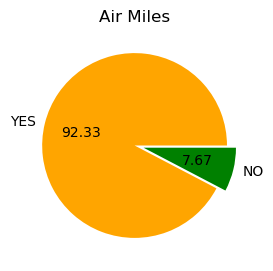

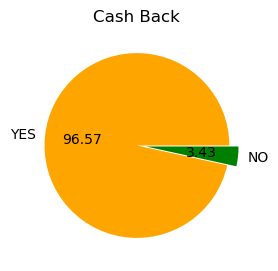

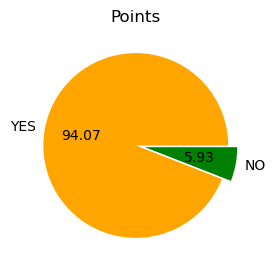

In [16]:
A = df['Reward'].value_counts().index
for i in range(len(A)):
    B = df.groupby(by='Reward')
    C = B.get_group(A[i])['Offer Accepted'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['YES','NO'], x=C.values, autopct='%.2f', colors=['orange','green'], explode=[0.0,0.1])
    plt.title(f'{A[i]}')
    plt.show()

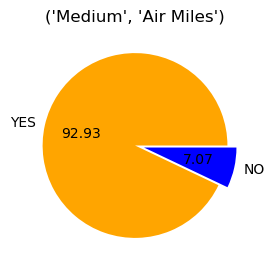

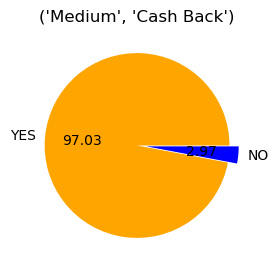

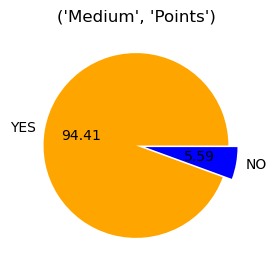

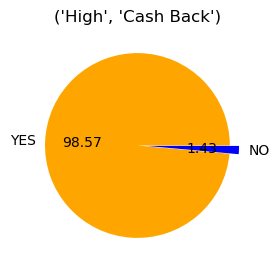

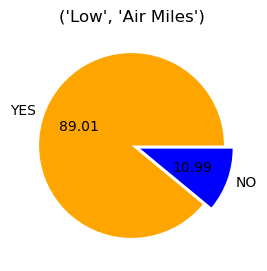

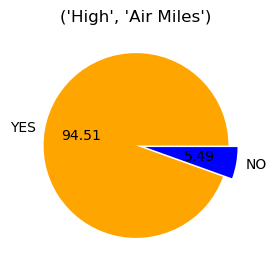

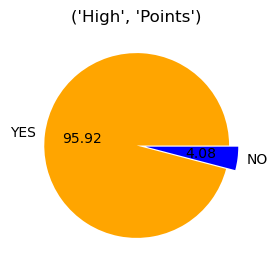

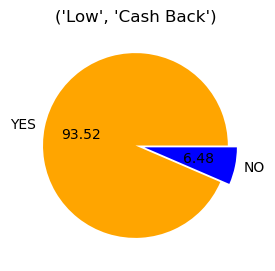

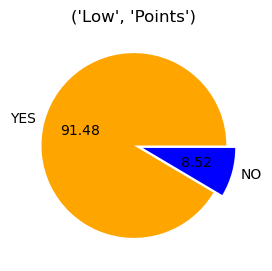

In [17]:
M = df[['Income Level','Reward']].value_counts().index
for i in range(len(M)):
    N = df.groupby(by=['Income Level','Reward'])
    O = N.get_group(M[i])['Offer Accepted'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['YES','NO'], x=O.values, autopct='%.2f', colors=['orange','blue'], explode=[0.0,0.1])
    plt.title(f'{M[i]}')
    plt.show()

In [18]:
num_col = []
cat_col = []

for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        num_col.append(i)
    else:
        cat_col.append(i)
print(num_col)
print('<=================================>')
print(cat_col)

['Customer Number', 'Bank Accounts Open', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
<=================================>
['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Overdraft Protection', 'Credit Rating', 'Own Your Home']


In [19]:
from scipy.stats import f_oneway

In [20]:
fcal,pval=f_oneway(df['Customer Number'],df['Bank Accounts Open'],df['Credit Cards Held'],df['Homes Owned'],df['Household Size']
                   ,df['Average Balance'],df['Q1 Balance'],df['Q2 Balance'],df['Q3 Balance'],df['Q4 Balance'])
print(fcal,pval)

47054.66380337875 0.0


In [21]:
import scipy.stats as stats 
from scipy.stats import chisquare, chi2_contingency, chi2

In [22]:
data=pd.crosstab(df['Offer Accepted'],df['Income Level'])
print(data)

Income Level    High   Low  Medium
Offer Accepted                    
No              4361  4073    8543
Yes              165   388     470


In [23]:
Observe_value = data.values
print('Observed_value:-\n', Observe_value)

Observed_value:-
 [[4361 4073 8543]
 [ 165  388  470]]


In [24]:
val = stats.chi2_contingency(data)
val

Chi2ContingencyResult(statistic=114.36759816901265, pvalue=1.463496214215802e-25, dof=2, expected_freq=array([[4268.77233333, 4207.4665    , 8500.76116667],
       [ 257.22766667,  253.5335    ,  512.23883333]]))

In [25]:
Expect_val = val[3]
Expect_val

array([[4268.77233333, 4207.4665    , 8500.76116667],
       [ 257.22766667,  253.5335    ,  512.23883333]])

In [26]:
no_of_row = len(data.iloc[0:2,0])
no_of_col = len(data.iloc[0,0:2])
Degree_of_freedom = (no_of_row-1)*(no_of_col-1)
print('degree of freedom',Degree_of_freedom)
alpha = 0.05

degree of freedom 1


In [27]:
chi_square = sum([(o-e)**2./e for o,e in zip(Observe_value,Expect_val)])
chi_statistic = chi_square[0]+chi_square[1]
critical_val = chi2.ppf(q=1-alpha,df=Degree_of_freedom)

In [28]:
p_val = 1-chi2.cdf(x=chi_statistic,df=Degree_of_freedom)
print('p value-',p_val)
print('Significance lebel-',alpha)
print('degree of freedom-',Degree_of_freedom)

p value- 0.0
Significance lebel- 0.05
degree of freedom- 1


In [29]:
if chi_statistic >= critical_val:
    print("Reject Hp have relation between 2 cat_col")
else:
    print("Accept HP no relation between 2 cat_col")
if p_val <= Degree_of_freedom:
    print("Reject HP have relation between 2 cat_col")
else:
    print("Accept HP no relation between 2 cat_col")

Reject Hp have relation between 2 cat_col
Reject HP have relation between 2 cat_col


In [30]:
num_col

['Customer Number',
 'Bank Accounts Open',
 'Credit Cards Held',
 'Homes Owned',
 'Household Size',
 'Average Balance',
 'Q1 Balance',
 'Q2 Balance',
 'Q3 Balance',
 'Q4 Balance']

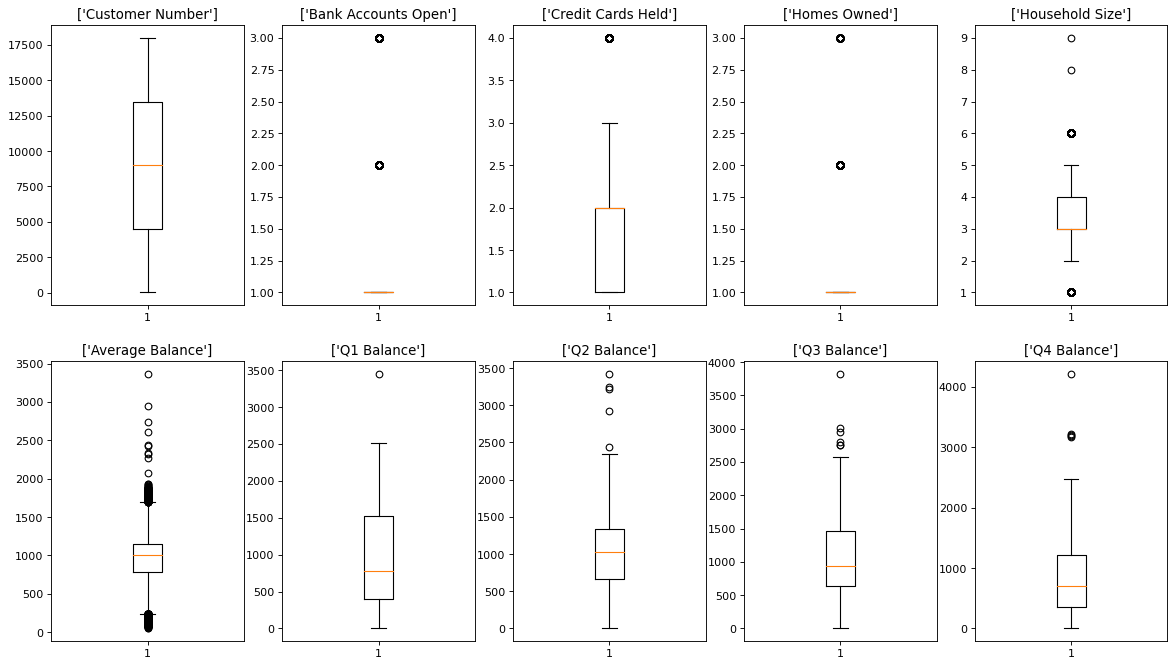

In [31]:
f,ax = plt.subplots(2,5, figsize=(18,10), dpi=80)
index = 0
try:
    for i in range(2):
        for j in range(5):
            ax[i,j].boxplot(df[num_col[index]])
            ax[i,j].set_title([num_col[index]])
            index+=1
except:
    pass
plt.show()

In [32]:
def limit(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    LL = Q1-1.5*IQR
    UL = Q3+1.5*IQR
    df[x].clip(LL, UL, inplace=True)

In [33]:
for i in num_col:
    limit(i)

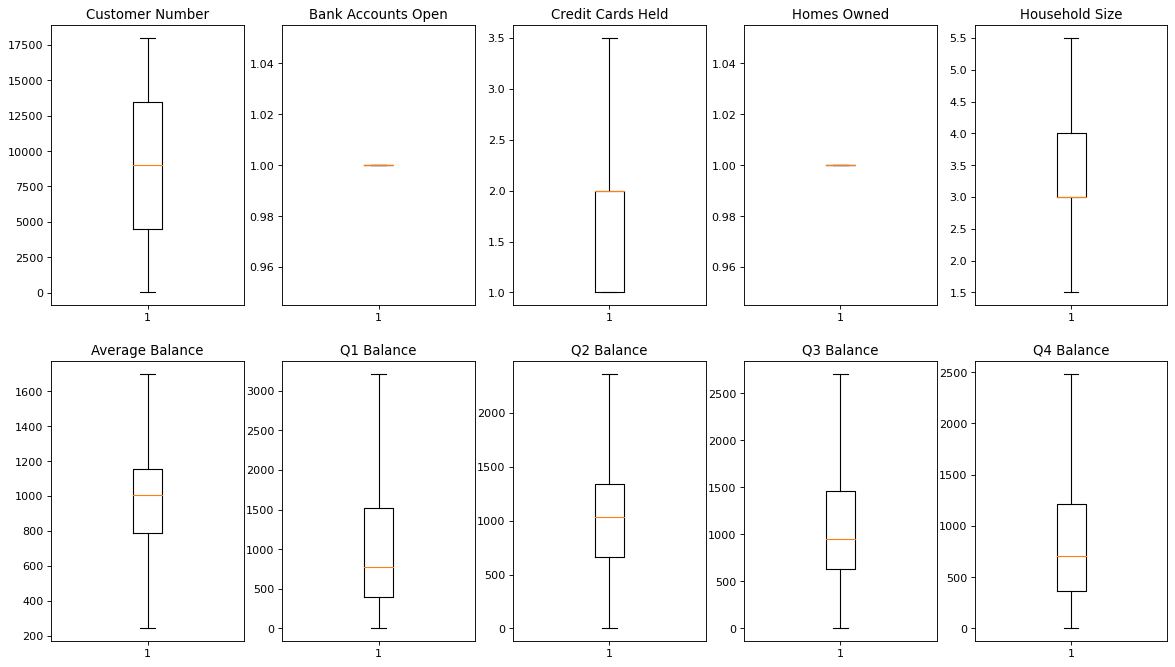

In [34]:
f,ax = plt.subplots(2,5, figsize=(18,10), dpi=80)
index_1 = 0
try:
    for i in range(2):
        for j in range(5):
            ax[i,j].boxplot(df[num_col[index_1]])
            ax[i,j].set_title(num_col[index_1])
            index_1+=1
except:
    pass
plt.show()

In [35]:
print(df['Offer Accepted'].unique())
print(df['Reward'].unique())
print(df['Mailer Type'].unique())
print(df['Income Level'].unique())
print(df['Overdraft Protection'].unique())
print(df['Credit Rating'].unique())
print(df['Own Your Home'].unique())

['No' 'Yes']
['Air Miles' 'Cash Back' 'Points']
['Letter' 'Postcard']
['High' 'Medium' 'Low']
['No' 'Yes']
['High' 'Medium' 'Low']
['No' 'Yes']


In [36]:
cat_col

['Offer Accepted',
 'Reward',
 'Mailer Type',
 'Income Level',
 'Overdraft Protection',
 'Credit Rating',
 'Own Your Home']

In [37]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
def ecode(a):
    Le.fit(a)
    print(a.name, Le.classes_)
    return Le.transform(a)

In [38]:
col = ['Offer Accepted','Reward','Mailer Type','Income Level','Overdraft Protection','Credit Rating','Own Your Home']
for i in col:
    df[i] = Le.fit_transform(df[i])

In [39]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,0,0,0,0,1,0,0,2.0,1,4.0,0,1160.75,1669.0,877.0,1095.0,1002.0
1,2,0,0,0,2,1,0,2,2.0,1,5.0,1,241.00,39.0,106.0,78.0,366.0
2,3,0,0,1,0,1,0,2,2.0,1,2.0,1,276.50,367.0,352.0,145.0,242.0
3,4,0,0,0,2,1,0,0,1.0,1,4.0,0,1219.00,1578.0,1760.0,1119.0,419.0
4,5,0,0,0,2,1,0,2,2.0,1,5.5,1,1211.00,2140.0,1357.0,982.0,365.0


In [40]:
print(df['Customer Number'].unique())
print(df['Homes Owned'].unique())
print(df['Reward'].unique())
print(df['Bank Accounts Open'].unique())
print(df['Mailer Type'].unique())
print(df['Income Level'].unique())
print(df['Overdraft Protection'].unique())
print(df['Credit Cards Held'].unique())
print(df['Credit Rating'].unique())
print(df['Household Size'].unique())
print(df['Own Your Home'].unique())

[    1     2     3 ... 17998 17999 18000]
[1]
[0 1 2]
[1]
[0 1]
[0 2 1]
[0 1]
[2.  1.  3.  3.5]
[0 2 1]
[4.  5.  2.  5.5 3.  1.5]
[0 1]


In [41]:
df1 = df.drop(['Average Balance','Q1 Balance','Q2 Balance','Q3 Balance','Q4 Balance'], axis=1)
df1.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home
0,1,0,0,0,0,1,0,0,2.0,1,4.0,0
1,2,0,0,0,2,1,0,2,2.0,1,5.0,1
2,3,0,0,1,0,1,0,2,2.0,1,2.0,1
3,4,0,0,0,2,1,0,0,1.0,1,4.0,0
4,5,0,0,0,2,1,0,2,2.0,1,5.5,1


In [42]:
x1 = df.drop(['Customer Number','Offer Accepted','Homes Owned','Reward','Bank Accounts Open','Mailer Type',
             'Income Level','Overdraft Protection','Credit Cards Held','Credit Rating',
             'Household Size','Own Your Home'],axis=1)
x1.head()

,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,241.00,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [43]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [44]:
column = x1.columns
column

Index(['Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance',
       'Q4 Balance'],
      dtype='object')

In [45]:
x1 = SS.fit_transform(x1)

In [46]:
x1 = pd.DataFrame(data = x1, columns=column)
x1.head()

,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0.645661,1.224289,-0.267788,0.096022,0.344459
1,-2.075996,-1.406464,-1.957335,-1.744085,-0.796149
2,-1.970947,-0.877086,-1.418257,-1.622858,-1.018532
3,0.818031,1.077419,1.667193,0.139446,-0.701099
4,0.794358,1.984464,0.784071,-0.108434,-0.797943


In [47]:
x2 = pd.concat([df1,x1],axis=1)
x2.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,0,0,0,0,1,0,0,2.0,1,4.0,0,0.645661,1.224289,-0.267788,0.096022,0.344459
1,2,0,0,0,2,1,0,2,2.0,1,5.0,1,-2.075996,-1.406464,-1.957335,-1.744085,-0.796149
2,3,0,0,1,0,1,0,2,2.0,1,2.0,1,-1.970947,-0.877086,-1.418257,-1.622858,-1.018532
3,4,0,0,0,2,1,0,0,1.0,1,4.0,0,0.818031,1.077419,1.667193,0.139446,-0.701099
4,5,0,0,0,2,1,0,2,2.0,1,5.5,1,0.794358,1.984464,0.784071,-0.108434,-0.797943


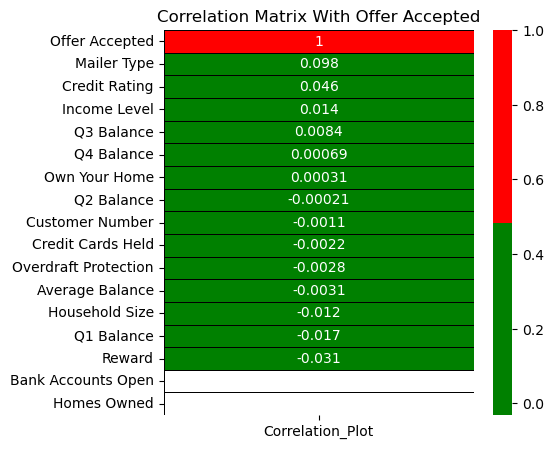

In [48]:
colors = ['#008000', '#ff0000']
corr = x2.corrwith(x2['Offer Accepted']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation_Plot']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix With Offer Accepted")
plt.show()

In [49]:
print(x2['Offer Accepted'].unique())

[0 1]


In [50]:
x2['Offer Accepted'].value_counts()

0    16977
1     1023
Name: Offer Accepted, dtype: int64

In [51]:
x = x2.drop('Offer Accepted',axis=1)
y = x2['Offer Accepted']

In [52]:
print(x.shape)
print(y.shape)

(18000, 16)
(18000,)


In [53]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(sampling_strategy=1)

In [54]:
x, y = ROS.fit_resample(x, y)

In [55]:
print(y.value_counts())

0    16977
1    16977
Name: Offer Accepted, dtype: int64


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def VIF(k):
    vif = pd.DataFrame()
    vif['features'] = k.columns
    vif['vif_value'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
    return vif

In [57]:
VIF(x)

,features,vif_value
0,Customer Number,1.001204
1,Reward,1.003464
2,Mailer Type,1.003533
3,Income Level,1.003957
4,Bank Accounts Open,0.000000
5,Overdraft Protection,1.001551
6,Credit Rating,1.001057
7,Credit Cards Held,1.002128
8,Homes Owned,0.000000
9,Household Size,1.004193


In [58]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() 

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=66, stratify=y)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23767, 16)
(23767,)
(10187, 16)
(10187,)


In [61]:
y_train.value_counts()

1    11884
0    11883
Name: Offer Accepted, dtype: int64

In [62]:
LR.fit(x_train, y_train)

LinearRegression()

In [63]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [64]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [65]:
print(LR.intercept_)
print(LR.coef_)

0.3403928166302404
[ 1.74628408e-08 -3.32960566e-02  2.21840092e-01  1.92282611e-02
 -3.50414142e-16  3.04133838e-03  7.30838937e-02 -4.72834645e-03
  5.41233725e-16 -1.14956600e-02  5.53530572e-03  1.32180333e-01
 -7.87136944e-02 -2.83662910e-02 -4.39526154e-02 -7.03924533e-02]


In [66]:
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.06529029714824286
0.0665149511802392


In [67]:
print(mean_squared_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.2336774234611687
0.4834019274487522


In [68]:
R2 = r2_score(y_test,y_pred_test)
n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-R2)*(n-1)/(n-k-1))
print('Adjusted R2 -',adj_r2)

Adjusted R2 - 0.06381976074257634


In [69]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_train_XGB = XGB.predict(x_train)
y_pred_test_XGB = XGB.predict(x_test)

In [71]:
print(accuracy_score(y_train, y_pred_train_XGB))
print('Train Test Accuracy Score XGB')
print(accuracy_score(y_test, y_pred_test_XGB))

0.9840535195859805
Train Test Accuracy Score XGB
0.9589673112790812


In [72]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion='entropy')
RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [73]:
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)

In [74]:
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))

0.9768332185850446
1.0
